In [1]:
import os
import time

import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import re
import matplotlib

from nltk.stem.snowball import SnowballStemmer
import nltk
import gensim
import spacy

import matplotlib.cm as cm

stemmer = SnowballStemmer("english")
nlp = spacy.load("en_core_web_sm")

In [2]:
from tool import *
# unique(x)
# find_kol(data,rank)
# unique_time(data)
# exforeign(data)
# duplicate(data)
# remove_link(data)
# remove_sign(data)
# total_clean(indata)
# toword(data,stem=False,stop=True)
# get_words(url), pos, neg, opinion
# debug2(sentence)
# month(start,end)
# search(data,keywords)
# LDA(data, topics, words,otherwords)
# NMF(data,topics,words,otherwords)

In [3]:
otherwords={'hi','wealthfront','betterment','robo','roboadvisor','roboadvisors',
            'wealthfronts','happy','im','vs','thanks','like','love','yet','yeah','via','want','one','a','an','advisor',
            'advisors','dont','didnt','financial','investment','wealth','finance'}

otherwords=otherwords.union(set(gensim.parsing.preprocessing.STOPWORDS))

In [4]:
m=month('2017-06','2020-05')
root_path=os.getcwd()
category=os.listdir(root_path+'\\SentiStrength\\final')
category

['Bank Brokerage', 'Discount Brokerage', 'Full Brokerage', 'Robo Advisor']

In [5]:
def read_data(path):
    structure=list(os.walk(path))
    summary=[]
    for i in structure:
        if not i[1]:
            temp=[]
            for j in i[2]:
                #print(i[0]+'\\'+j)
                #temp.append([(x['text'],x['positive'],x['negative']) for x in anothertemp])
                if j=='TDAmeritrade2017-07.json': 
                    temp.append([])
                if j=='Wealthfront2017-08.json':
                    temp.append([])
                temp.append([{'text':x['text'],'positive':x['positive'],'negative':x['negative']} for x in json.load(open(i[0]+'\\'+j))[:-1]])
            summary.append(temp)
    #return summary
    def lsum(list_):
        result=[]
        num=len(list_[0])
        for i in range(num):
            temp=[]
            for j in list_:
                temp+=j[i]
            result.append(temp)
        return result
    return lsum(summary)

In [6]:
#list(os.walk(root_path+'\\SentiStrength\\final\\Bank Brokerage'))

In [7]:
metadata=[]
for i in category:
    metadata.append([])
    metadata[-1]=read_data(root_path+'\\SentiStrength\\final\\'+i)

In [8]:
for i in metadata:
    print(len(i))

36
36
36
36


In [9]:
msdata=[]
temp=os.listdir(root_path+'\\MS_weekly')
for i in temp:
    msdata.append(total_clean(json.load(open(root_path+'\\MS_weekly\\'+i)))[:-1])

In [10]:
for i in msdata:
    print(len(i))

4573
4964
4673
4889
4176
5006
5374
5126
3959
3996
3604
5129
4839
4095
3973
5671
4345
3860
3627
3467
3541
4300
3987
5316
3796
3263
3160
3563
3453
3429
3078
3414
3825
4729
4456
4504


In [11]:
def subanalyze(data,keywords): # data hierarchy: months*(text,score)*piece
    pospolarity=[]
    negpolarity=[]
    freq=[]
    for k in data:
        pos=0
        neg=0
        count=0
        for i in k:
            for j in keywords:
                if j in i['text'].lower():
                    pos+=i['positive']
                    neg+=i['negative']
                    count+=1
                    break
        pospolarity.append(pos/max(1,count))
        negpolarity.append(neg/max(1,count))
        freq.append(count)
    return pospolarity,negpolarity,freq

def double(data,keyword_list):
    app=subanalyze(data,keyword_list)
    matplotlib.rcParams['figure.dpi'] = 100
    fig, ax1 = plt.subplots()
    ax1.plot(np.array(m),app[0],color='C1')
    ax1.set_xticks(np.arange(36))
    ax1.set_xticklabels([i if x%3==0 else '' for x,i in enumerate(m)],rotation=45)
    ax1.set_ylabel('Positive')
    for t in ax1.xaxis.get_ticklines():
        t.set_visible(False)
    for t in ax1.xaxis.get_ticklines()[::2][::3]:
        t.set_visible(True)
    ax2 = ax1.twinx()
    for t in ax2.xaxis.get_ticklines():
        t.set_visible(False)
    for t in ax2.xaxis.get_ticklines()[::2][::3]:
        t.set_visible(True)
    ax2.set_xticks(np.arange(36))
    ax2.set_xticklabels([i if x%3==0 else '' for x,i in enumerate(m)],rotation=45)
    ax2.plot(m,app[1],color='C2')
    ax2.set_ylabel('Negative')
    ax1.set_title('Keywords: '+', '.join(keyword_list[:3]))
    plt.show()
    
def trend(data,hint,keyword_list): # hint=0 for pos, 1 for neg
    app=subanalyze(data,keyword_list)
    matplotlib.rcParams['figure.dpi'] = 100
    fig, ax1 = plt.subplots()
    ax1.plot(np.array(m),np.array(app[hint])-1,color='C'+str(hint+1))
    ax1.set_xticks(np.arange(36))
    ax1.set_xticklabels([i if x%3==0 else '' for x,i in enumerate(m)],rotation=45)
    ax1.set_ylabel('Sentiment Polarity')
    for t in ax1.xaxis.get_ticklines():
        t.set_visible(False)
    for t in ax1.xaxis.get_ticklines()[::2][::3]:
        t.set_visible(True)
    ax2 = ax1.twinx()
    for t in ax2.xaxis.get_ticklines():
        t.set_visible(False)
    for t in ax2.xaxis.get_ticklines()[::2][::3]:
        t.set_visible(True)
    ax2.set_xticks(np.arange(36))
    ax2.set_xticklabels([i if x%3==0 else '' for x,i in enumerate(m)],rotation=45)
    ax2.bar(m,app[2],alpha=0.3)
    ax2.set_ylabel('Sentiment Frequency')
    #ax1.set_title('Keywords: '+', '.join(keyword_list[:3]))
    plt.show()
    
def all_trend(data,hint,keyword_list):
    app=[subanalyze(i,keyword_list) for i in data]
    matplotlib.rcParams['figure.dpi'] = 200
    fig, ax = plt.subplots(2,2,sharex=True,sharey=True,figsize=(12,8))
    for i in range(2):
        for j in range(2):
            temp=2*i+j
            
            ax[i][j].plot(np.array(m),app[temp][hint],color='C'+str(hint+1))
            ax[i][j].set_xticks(np.arange(36))
            ax[i][j].set_xticklabels([i if x%3==0 else '' for x,i in enumerate(m)],rotation=45)
            if not j:
                ax[i][j].set_ylabel('Sentiment Polarity')
            for t in ax[i][j].xaxis.get_ticklines():
                t.set_visible(False)
            for t in ax[i][j].xaxis.get_ticklines()[::2][::3]:
                t.set_visible(True)
            ax2 = ax[i][j].twinx()
            for t in ax2.xaxis.get_ticklines():
                t.set_visible(False)
            for t in ax2.xaxis.get_ticklines()[::2][::3]:
                t.set_visible(True)
            ax2.set_xticks(np.arange(36))
            ax2.set_xticklabels([i if x%3==0 else '' for x,i in enumerate(m)],rotation=45)
            ax2.bar(m,app[temp][2],alpha=0.3)
            if j:
                ax2.set_ylabel('Sentiment Frequency')
            ax[i][j].set_title(category[temp])
    plt.suptitle('Keywords: '+', '.join(keyword_list[:3]))
    plt.show()

def show(entity,month,keyword):
    a,b=0,0
    result=[]
    for i in metadata[entity][month]:
        s=0
        for j in keyword:
            if j in i['text'].lower():
                s=1
        if s:
            #print(i,data[entity][month][1][x])
            result.append(i)
    return sorted(result,key=lambda x : x['text'])

def classify(monthdata):
    pos=[]
    neg=[]
    for i in monthdata:
        poscnt=0
        negcnt=0
        for k in i:
            if k['positive']>=-1.5*k['negative']:
                poscnt+=1
            elif -k['negative']>=1.5*k['positive']:
                negcnt+=1
        pos.append(poscnt/max(len(i),1))
        neg.append(negcnt/max(len(i),1))
    return pos,neg

## MS

In [12]:
m=month('2017-06','2020-05')
m.index('2019-05')

23

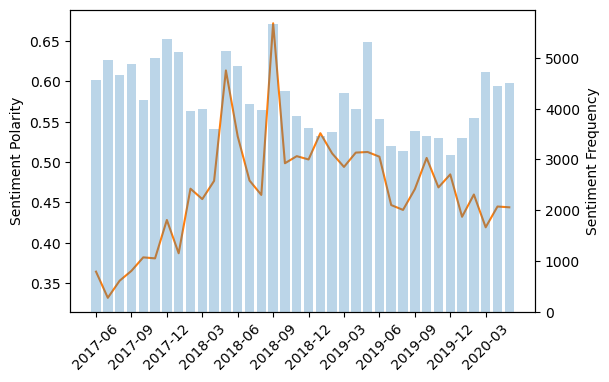

In [13]:
trend(msdata,0,[''])

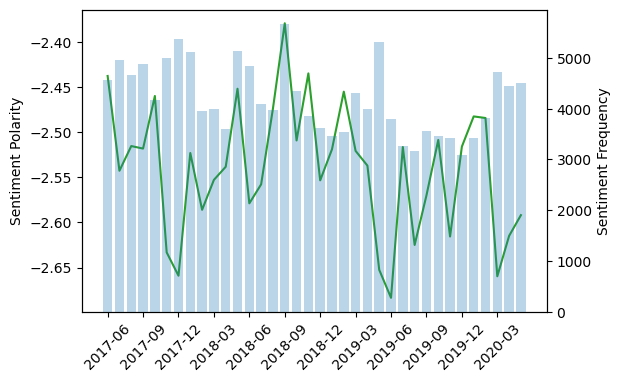

In [14]:
trend(msdata,1,[''])

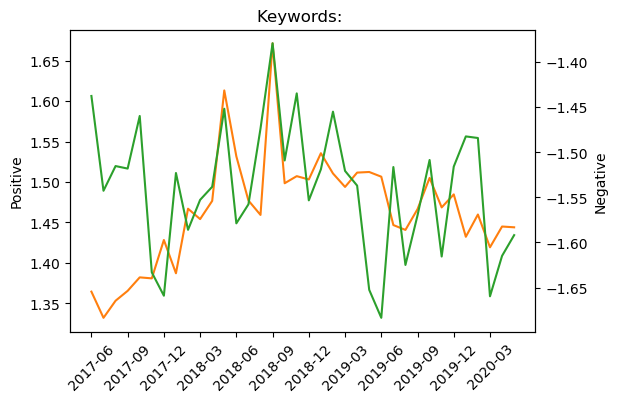

In [15]:
double(msdata,['']) # 1,4,5, 11(morgan stanley garden, justin rose), 23, -3

In [16]:
#temp=classify(msdata)
#plt.plot(temp[0],color='C1')
#plt.plot(temp[1],color='C2')

### Word cloud

In [89]:
from wordcloud import WordCloud, STOPWORDS

def wordcloud(data):
    matplotlib.rcParams['figure.dpi'] = 100
    wordcloud = WordCloud(width = 500, height = 500, max_words=30,
                background_color ='white',
                stopwords = STOPWORDS.union({})).generate(' '.join([i['text'].lower() for i in data]))
    plt.axis('off')
    plt.imshow(wordcloud)

#### 1 (withdraw the U.S. from the 2015 Paris Agreement)

In [65]:
unique([(i['positive'],i['negative']) for i in msdata[0]])

[((1, -1), 2217, 48.48),
 ((1, -2), 849, 18.57),
 ((2, -1), 561, 12.27),
 ((3, -1), 271, 5.93),
 ((1, -3), 198, 4.33),
 ((2, -2), 190, 4.15),
 ((1, -4), 71, 1.55),
 ((3, -2), 64, 1.4),
 ((2, -3), 62, 1.36),
 ((4, -1), 27, 0.59),
 ((2, -4), 23, 0.5),
 ((3, -3), 22, 0.48),
 ((3, -4), 9, 0.2),
 ((1, -5), 3, 0.07),
 ((5, -1), 1, 0.02),
 ((5, -4), 1, 0.02),
 ((4, -4), 1, 0.02),
 ((4, -3), 1, 0.02),
 ((4, -2), 1, 0.02),
 ((2, -5), 1, 0.02)]

In [66]:
unique([(i['positive'],i['negative']) for i in msdata[1]])

[((1, -1), 2229, 44.9),
 ((1, -2), 995, 20.04),
 ((2, -1), 621, 12.51),
 ((1, -3), 337, 6.79),
 ((2, -2), 213, 4.29),
 ((3, -1), 204, 4.11),
 ((1, -4), 113, 2.28),
 ((2, -3), 85, 1.71),
 ((3, -2), 57, 1.15),
 ((2, -4), 35, 0.71),
 ((3, -3), 26, 0.52),
 ((3, -4), 15, 0.3),
 ((4, -1), 14, 0.28),
 ((4, -2), 6, 0.12),
 ((1, -5), 5, 0.1),
 ((5, -2), 2, 0.04),
 ((5, -3), 2, 0.04),
 ((2, -5), 1, 0.02),
 ((5, -4), 1, 0.02),
 ((5, -1), 1, 0.02),
 ((4, -4), 1, 0.02),
 ((4, -3), 1, 0.02)]

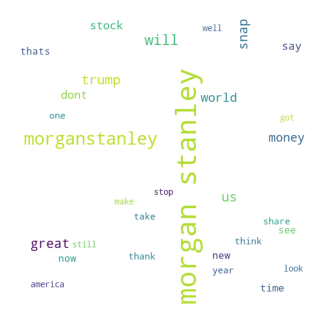

In [108]:
wordcloud([i for i in msdata[1] if i['positive']*i['negative']==-3])

In [21]:
#text(search(search(msdata[1],['trump']),['great']))
text(search(msdata[1],['trump']))

212


[' Like trump right',
 ' Morgan Stanley says renewables are cheaper than oil gas by far Trump not a factor',
 ' million illegal voters Trumps birther lie Obama wire tapped his phone ect ect',
 ' of scientists think otherwise I trust science not Trump who says it is a Chinese hoax',
 ' years Trump then comes Mike Pence',
 'A picture of the Trump Trains pulling in how beautiful',
 'Ahhh naaaah youre a bit paranoid there Michael Breathe let Trump lead us out of the fog of globalist propaganda',
 'America First President Trump revitalizes the economy which was stagnant under Big Government Establishment Rule and Debet begins to fall',
 'And HRC is not relevant as election is over Trump still has done nothing her or any else he promised to jail',
 'And Trump is hell bent on diminishing women s empowerment in every way possible',
 'And move it to Brussels lock stock and barrel and have Eric Trump redevelop that NYC site into affordable apts for his fathers supporters',
 'And on the front of 

#### 5

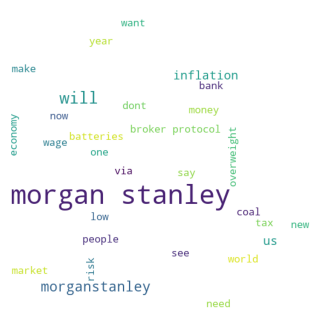

In [22]:

wordcloud([i for i in msdata[5] if i['positive']==1 and i['negative']==-2])

#### 11 (Fort Worth Invitational)

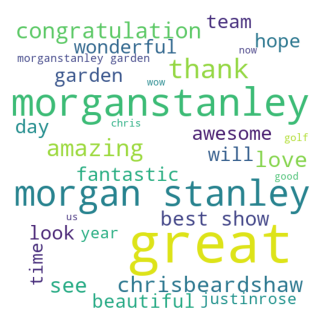

In [88]:
wordcloud([i for i in msdata[11] if i['positive']==3 and i['negative']==-1])

#### 15 (Those finishes moved Rose to World Number One in the Official World Golf Ranking)

In [24]:
unique([(i['positive'],i['negative']) for i in msdata[14]])

[((1, -1), 1743, 43.87),
 ((1, -2), 644, 16.21),
 ((2, -1), 563, 14.17),
 ((2, -2), 265, 6.67),
 ((3, -1), 244, 6.14),
 ((1, -3), 173, 4.35),
 ((3, -2), 104, 2.62),
 ((2, -3), 81, 2.04),
 ((1, -4), 48, 1.21),
 ((3, -3), 31, 0.78),
 ((4, -1), 23, 0.58),
 ((2, -4), 23, 0.58),
 ((3, -4), 21, 0.53),
 ((4, -2), 3, 0.08),
 ((2, -5), 3, 0.08),
 ((4, -3), 2, 0.05),
 ((3, -5), 1, 0.03),
 ((5, -1), 1, 0.03)]

In [25]:
unique([(i['positive'],i['negative']) for i in msdata[15]])

[((1, -1), 2278, 40.17),
 ((3, -1), 976, 17.21),
 ((2, -1), 763, 13.45),
 ((1, -2), 711, 12.54),
 ((2, -2), 242, 4.27),
 ((1, -3), 203, 3.58),
 ((3, -2), 150, 2.65),
 ((2, -3), 106, 1.87),
 ((4, -1), 65, 1.15),
 ((1, -4), 52, 0.92),
 ((3, -3), 51, 0.9),
 ((2, -4), 26, 0.46),
 ((4, -2), 21, 0.37),
 ((3, -4), 16, 0.28),
 ((4, -3), 4, 0.07),
 ((1, -5), 3, 0.05),
 ((5, -1), 2, 0.04),
 ((4, -4), 1, 0.02),
 ((5, -2), 1, 0.02)]

In [26]:
print(11,m[11])
print(15,m[15])

11 2018-05
15 2018-09


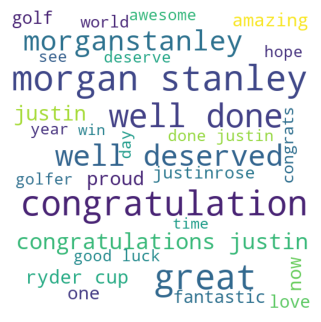

In [27]:
wordcloud([i for i in msdata[15] if i['positive']==3 and i['negative']==-1])

#### 24 2019-06 

In [28]:
unique([(i['positive'],i['negative']) for i in msdata[25]])

[((1, -1), 1359, 41.65),
 ((1, -2), 589, 18.05),
 ((2, -1), 421, 12.9),
 ((3, -1), 211, 6.47),
 ((2, -2), 208, 6.37),
 ((1, -3), 201, 6.16),
 ((3, -2), 87, 2.67),
 ((2, -3), 74, 2.27),
 ((1, -4), 35, 1.07),
 ((3, -3), 29, 0.89),
 ((2, -4), 18, 0.55),
 ((4, -1), 16, 0.49),
 ((3, -4), 7, 0.21),
 ((4, -2), 5, 0.15),
 ((4, -3), 2, 0.06),
 ((1, -5), 1, 0.03)]

In [29]:
unique([(i['positive'],i['negative']) for i in msdata[24]+msdata[23]])

[((1, -1), 3032, 33.27),
 ((1, -2), 1636, 17.95),
 ((2, -1), 1186, 13.02),
 ((1, -3), 919, 10.09),
 ((3, -1), 684, 7.51),
 ((2, -2), 617, 6.77),
 ((2, -3), 291, 3.19),
 ((3, -2), 237, 2.6),
 ((1, -4), 163, 1.79),
 ((4, -1), 84, 0.92),
 ((3, -3), 84, 0.92),
 ((2, -4), 78, 0.86),
 ((3, -4), 48, 0.53),
 ((4, -2), 19, 0.21),
 ((1, -5), 13, 0.14),
 ((4, -3), 9, 0.1),
 ((4, -4), 4, 0.04),
 ((2, -5), 3, 0.03),
 ((5, -2), 2, 0.02),
 ((5, -1), 2, 0.02),
 ((3, -5), 1, 0.01)]

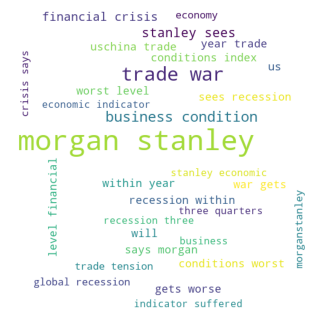

In [53]:
wordcloud([i for i in msdata[24] if i['positive']==1 and i['negative']==-3])

#### 33 2020-03

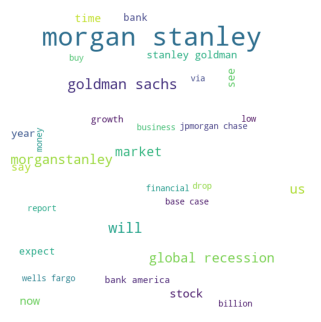

In [61]:
wordcloud([i for i in msdata[33] if i['positive']==1 and i['negative']==-2])

### broker protocol

In [32]:
protocol=[search(search(i,['protocol']),['broker']) for i in msdata][4:11]
for i in protocol:
    print(len(i))

22
61
8
4
3
4
2


In [33]:
text(protocol[0])

22


[' leaving the Protocol for Broker Recruiting',
 'BREAKING Morgan Stanley dumps broker recruiting protocol newsfromIN BDNEWSGUY',
 'Brian Hamburger JD CRPC MarketCounsel leads with the recent news of MorganStanley dumping broker recruiting protocol ',
 'Broker protocol exit by morganstanley due to loss Let the begin AndrewWelsch great article',
 'California Securities Lawyers Morgan Stanley Ditches the Broker Protocol ',
 'Did MorganStanley just kill the broker protocol agreement by JeffBenjamin',
 'Lawsuits by BDs for TRO breach of restrictive covenants to come Morgan Stanley dumps broker recruiting protocol ',
 'Morgan Stanley Withdrawing from the Protocol for Broker Recruiting Read more on our Transitions in Employment blog ',
 'Morgan Stanley dumps broker recruiting protocol ',
 'Morgan Stanley dumps broker recruiting protocol via newsfromIN',
 'Morgan Stanley exits Broker Protocol Huge news in the financial services recruiting world',
 'Morgan Stanley exits Broker Protocol will ot

In [34]:
text(protocol[1])

61


[' files first TRO postwithdrawal from Broker Protocol Rumored won',
 ' takeaways from exiting Broker Protocol new solicitation strategies will need to be used whos next Merrill',
 'Ahead of Broker Protocol exit M Morgan Stanley team jumps to Baird ',
 'Another Firm Follows UBS and Morgan Stanley Out of the Broker Protocol Are you among these firms and has it affected you ',
 'As Morgan Stanley exits the Broker Protocol Alan Foxman reminds advisors to check their employment contracts',
 'As Morgan Stanley exits the Broker Protocol Alan Foxman reminds advisors to check their employment contracts ',
 'BD Advisor Valuations To Compress As Morgan Stanley Withdrawal Unravels The Broker Protocol other Weekend Reading for Financial Planners Nov ',
 'BDNewsGuy continues to dig into the UBS decision to exit the broker recruiting protocol finds this move and Morgan Stanleys show independent channel is bleeding wirehouses of advisers via newsfromIN',
 'BREAKING NEWS UBS Follows Morgan Stanley Out

In [35]:
text(protocol[2])

8


['As effects from the broker protocol continue to take shape execs formerly of Morgan Stanley Smith Barney find success recruiting teams from their old firms via newsfromIN',
 'BREAKING Merrill Lynch to remain in the broker protocol contrary to rivals UBS and Morgan Stanley BDNEWSGUY',
 'Merrill Lynch wont follow Morgan Stanley UBS out of broker protocol via BarronsOnline',
 'MerrillLynch to Stay in Broker Protocol Wells Fargo on FenceOne recruiter wonders why the BofA wealth unit is staying in the recruiting deal while Morgan Stanley and UBS have left ',
 'Morgan Stanley broker leaves with only Protocol client information Morgan Stanley hits the broker with a restraining order because its not in the Protocol For those who didnt believe Morgan Stanley would be aggressive against their former brokers ',
 'Morgan Stanley will boost savings with brokerprotocol exit UBS analysts say ',
 'The postBroker Protocol exodus continues RaymondJames nabs million producer from Morgan Stanley ',
 'UB

In [36]:
text(protocol[3])

4


['Broker Protocol Gets New AdministratorThe news comes about three months after questions were raised over law firms handling of Morgan Stanley information ',
 'Broker had just M of AUM Morgan Stanley has trillions Appears MS was sending another postProtocol warning to the rest of their brokers Another Former Morgan Stanley Broker Loses New Job After TRO via AdvisorHubINC',
 'Lost brokers in Q biggest quarterly loss of the year But its still only of their k brokers Breakaways are a trickle not a flood Morgan Stanley reports a loss of advisers after exiting the protocol for broker recruiting via ',
 'Morgan Stanley continues to take a whack at departing brokers now that it left the Broker Protocol But this time the court denied the TRO and sided with the departing broker In Texas even Morgan Stanley Brokers Jump to Ameriprise Win in Court ']

In [37]:
protocol=[search(i,['protocol']) for i in msdata]
for i in protocol:
    print(len(i))

0
0
2
0
25
81
12
6
4
5
6
1
0
2
2
2
2
2
0
0
0
0
1
0
0
1
0
1
0
0
0
1
0
0
1
0
